In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# Connecting to Data Folder.
%cd /content/drive/MyDrive/AMS559_Smart_Energy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AMS559_Smart_Energy


In [ ]:
import pandas as pd
date_column_name = 'connectionTime'
# Read the training data from a CSV file and convert the date column to datetime format
train_data = pd.read_csv('train.csv')
train_data[date_column_name] = pd.to_datetime(train_data[date_column_name])
# Filter the training data to include only November and December entries
nov_dec_train_data = train_data[train_data[date_column_name].dt.month.isin([11, 12])]

# Read the December data from an Excel file and convert the date column to datetime format
december_data = pd.read_excel('December.xlsx')
december_data[date_column_name] = pd.to_datetime(december_data[date_column_name])
# Filter the December data to include only entries from December
december_only_data = december_data[december_data[date_column_name].dt.month == 12]

# Combine the filtered November-December training data and December data into a single DataFrame
combined_data = pd.concat([nov_dec_train_data, december_only_data], ignore_index=True)



In [ ]:
combined_data

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/8/requestedDeparture,userInputs/8/userID,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID
0,5fdd57b1f9af8b16e6675dc6,39,2020-11-18 21:37:02,"Thu, 19 Nov 2020 02:29:15 GMT","Wed, 18 Nov 2020 22:45:41 GMT",2.237,2_39_78_365_2020-11-18 21:37:01.529096,2,CA-321,2-39-78-365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fdd57b1f9af8b16e6675dc7,39,2020-11-18 23:36:26,"Thu, 19 Nov 2020 00:02:37 GMT",NaN,4.816,2_39_81_4550_2020-11-18 23:36:26.012461,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fdd57b1f9af8b16e6675dc8,39,2020-11-19 00:35:54,"Thu, 19 Nov 2020 01:31:08 GMT",NaN,10.027,2_39_81_4550_2020-11-19 00:35:53.924922,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fdd57b1f9af8b16e6675dc9,39,2020-11-19 01:34:02,"Thu, 19 Nov 2020 02:45:14 GMT",NaN,24.486,2_39_81_4550_2020-11-19 01:33:46.845927,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fdd57b1f9af8b16e6675dca,39,2020-11-19 02:07:56,"Thu, 19 Nov 2020 03:51:11 GMT","Thu, 19 Nov 2020 03:51:02 GMT",11.507,2_39_128_18_2020-11-19 02:07:56.420183,2,CA-308,2-39-128-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,6003931bf9af8b5261c8c794,39,2020-12-31 16:45:14,"Thu, 31 Dec 2020 17:30:59 GMT","Thu, 31 Dec 2020 17:30:54 GMT",5.289,2_39_127_19_2020-12-31 16:45:13.554563,2,CA-309,2-39-127-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,6003931bf9af8b5261c8c795,39,2020-12-31 17:42:03,"Thu, 31 Dec 2020 18:29:00 GMT",NaN,20.526,2_39_81_4550_2020-12-31 17:42:03.239398,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,6003931bf9af8b5261c8c796,39,2020-12-31 21:25:29,"Fri, 01 Jan 2021 00:36:05 GMT","Fri, 01 Jan 2021 00:16:18 GMT",9.895,2_39_79_379_2020-12-31 21:25:29.351099,2,CA-327,2-39-79-379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,6003931bf9af8b5261c8c797,39,2020-12-31 22:32:13,"Thu, 31 Dec 2020 23:19:34 GMT",NaN,24.639,2_39_81_4550_2020-12-31 22:32:12.654403,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert relevant columns to datetime format
combined_data['doneChargingTime'] = combined_data['doneChargingTime'].fillna(combined_data['disconnectTime'])
time_columns = ['connectionTime', 'disconnectTime', 'doneChargingTime']
for col in time_columns:
    combined_data[col] = pd.to_datetime(combined_data[col], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')

# Display data to confirm conversion
combined_data[time_columns]

,connectionTime,disconnectTime,doneChargingTime
0,2020-11-18 21:37:02,2020-11-19 02:29:15,2020-11-18 22:45:41
1,2020-11-18 23:36:26,2020-11-19 00:02:37,2020-11-19 00:02:37
2,2020-11-19 00:35:54,2020-11-19 01:31:08,2020-11-19 01:31:08
3,2020-11-19 01:34:02,2020-11-19 02:45:14,2020-11-19 02:45:14
4,2020-11-19 02:07:56,2020-11-19 03:51:11,2020-11-19 03:51:02
...,...,...,...
264,2020-12-31 16:45:14,2020-12-31 17:30:59,2020-12-31 17:30:54
265,2020-12-31 17:42:03,2020-12-31 18:29:00,2020-12-31 18:29:00
266,2020-12-31 21:25:29,2021-01-01 00:36:05,2021-01-01 00:16:18
267,2020-12-31 22:32:13,2020-12-31 23:19:34,2020-12-31 23:19:34


In [ ]:
# Round down connectionTime to the nearest hour
combined_data['connectionHour'] = combined_data['connectionTime'].dt.floor('H')
combined_data['doneChargingHour'] = combined_data['doneChargingTime'].dt.floor('H')
combined_data['disconnectChargingHour'] = combined_data['disconnectTime'].dt.floor('H')
req_columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'connectionHour', 'disconnectChargingHour','doneChargingHour', 'kWhDelivered' ]

combined_data[req_columns]

,connectionTime,disconnectTime,doneChargingTime,connectionHour,disconnectChargingHour,doneChargingHour,kWhDelivered
0,2020-11-18 21:37:02,2020-11-19 02:29:15,2020-11-18 22:45:41,2020-11-18 21:00:00,2020-11-19 02:00:00,2020-11-18 22:00:00,2.237
1,2020-11-18 23:36:26,2020-11-19 00:02:37,2020-11-19 00:02:37,2020-11-18 23:00:00,2020-11-19 00:00:00,2020-11-19 00:00:00,4.816
2,2020-11-19 00:35:54,2020-11-19 01:31:08,2020-11-19 01:31:08,2020-11-19 00:00:00,2020-11-19 01:00:00,2020-11-19 01:00:00,10.027
3,2020-11-19 01:34:02,2020-11-19 02:45:14,2020-11-19 02:45:14,2020-11-19 01:00:00,2020-11-19 02:00:00,2020-11-19 02:00:00,24.486
4,2020-11-19 02:07:56,2020-11-19 03:51:11,2020-11-19 03:51:02,2020-11-19 02:00:00,2020-11-19 03:00:00,2020-11-19 03:00:00,11.507
...,...,...,...,...,...,...,...
264,2020-12-31 16:45:14,2020-12-31 17:30:59,2020-12-31 17:30:54,2020-12-31 16:00:00,2020-12-31 17:00:00,2020-12-31 17:00:00,5.289
265,2020-12-31 17:42:03,2020-12-31 18:29:00,2020-12-31 18:29:00,2020-12-31 17:00:00,2020-12-31 18:00:00,2020-12-31 18:00:00,20.526
266,2020-12-31 21:25:29,2021-01-01 00:36:05,2021-01-01 00:16:18,2020-12-31 21:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,9.895
267,2020-12-31 22:32:13,2020-12-31 23:19:34,2020-12-31 23:19:34,2020-12-31 22:00:00,2020-12-31 23:00:00,2020-12-31 23:00:00,24.639


In [ ]:
import pandas as pd

def expand_and_distribute(row):
    start_hour = pd.to_datetime(row['connectionHour'])
    end_hour = pd.to_datetime(row['disconnectChargingHour'])
    kwh = row['kWhDelivered']

    # Generate all hours between start and end
    all_hours = pd.date_range(start=start_hour, end=end_hour, freq='H', inclusive='left')

    # Calculate kWh delivered per hour
    hours_count = len(all_hours)
    kwh_per_hour = kwh / hours_count if hours_count else 0

    # Create a DataFrame for each hour in the range
    hourly_data = pd.DataFrame({
        'connectionHour': all_hours,
        'disconnectChargingHour': end_hour,
        'kWhDelivered': kwh_per_hour
    })

    return hourly_data

# Apply the function to each row and concatenate the results
expanded_data = pd.concat([expand_and_distribute(row) for _, row in combined_data.iterrows()], ignore_index=True)

# Display expanded dataframe
expanded_data


,connectionHour,disconnectChargingHour,kWhDelivered
0,2020-11-18 21:00:00,2020-11-19 02:00:00,0.447400
1,2020-11-18 22:00:00,2020-11-19 02:00:00,0.447400
2,2020-11-18 23:00:00,2020-11-19 02:00:00,0.447400
3,2020-11-19 00:00:00,2020-11-19 02:00:00,0.447400
4,2020-11-19 01:00:00,2020-11-19 02:00:00,0.447400
...,...,...,...
714,2020-12-31 22:00:00,2021-01-01 00:00:00,3.298333
715,2020-12-31 23:00:00,2021-01-01 00:00:00,3.298333
716,2020-12-31 22:00:00,2020-12-31 23:00:00,24.639000
717,2020-12-31 23:00:00,2021-01-01 01:00:00,26.529000


In [ ]:
# Group by the rounded connectionHour and aggregate kWhDelivered
kwh_per_hour = expanded_data.groupby('connectionHour')['kWhDelivered'].sum().reset_index()

# Display the aggregated rows
kwh_per_hour

,connectionHour,kWhDelivered
0,2020-11-18 21:00:00,0.447400
1,2020-11-18 22:00:00,0.447400
2,2020-11-18 23:00:00,5.263400
3,2020-11-19 00:00:00,10.474400
4,2020-11-19 01:00:00,24.933400
...,...,...
463,2020-12-31 17:00:00,20.526000
464,2020-12-31 21:00:00,3.298333
465,2020-12-31 22:00:00,27.937333
466,2020-12-31 23:00:00,29.827333


In [ ]:
# Create a complete range of hourly timestamps
time_range = pd.date_range(start='2020-11-01 00:00:00',
                           end='2020-12-31 23:00:00',
                           freq='H')

# Create a DataFrame from the complete time range
complete_time_df = pd.DataFrame(time_range, columns=['connectionHour'])

# Merge with the aggregated data to identify missing hours
merged_data = pd.merge(complete_time_df, kwh_per_hour, on='connectionHour', how='left')

# Check for missing values, indicating missing hours
missing_hours = merged_data[merged_data['kWhDelivered'].isnull()]

# Display missing hours, if any
missing_hours

,connectionHour,kWhDelivered
0,2020-11-01 00:00:00,NaN
1,2020-11-01 01:00:00,NaN
2,2020-11-01 02:00:00,NaN
3,2020-11-01 03:00:00,NaN
4,2020-11-01 04:00:00,NaN
...,...,...
1454,2020-12-31 14:00:00,NaN
1455,2020-12-31 15:00:00,NaN
1458,2020-12-31 18:00:00,NaN
1459,2020-12-31 19:00:00,NaN


In [ ]:
# Fill the missing values in 'kWhDelivered' column
merged_data['kWhDelivered'] = merged_data['kWhDelivered'].fillna(0)


# Display some of the previously missing rows to confirm they're now filled
merged_data.loc[missing_hours.index].head()
merged_data


,connectionHour,kWhDelivered
0,2020-11-01 00:00:00,0.000000
1,2020-11-01 01:00:00,0.000000
2,2020-11-01 02:00:00,0.000000
3,2020-11-01 03:00:00,0.000000
4,2020-11-01 04:00:00,0.000000
...,...,...
1459,2020-12-31 19:00:00,0.000000
1460,2020-12-31 20:00:00,0.000000
1461,2020-12-31 21:00:00,3.298333
1462,2020-12-31 22:00:00,27.937333


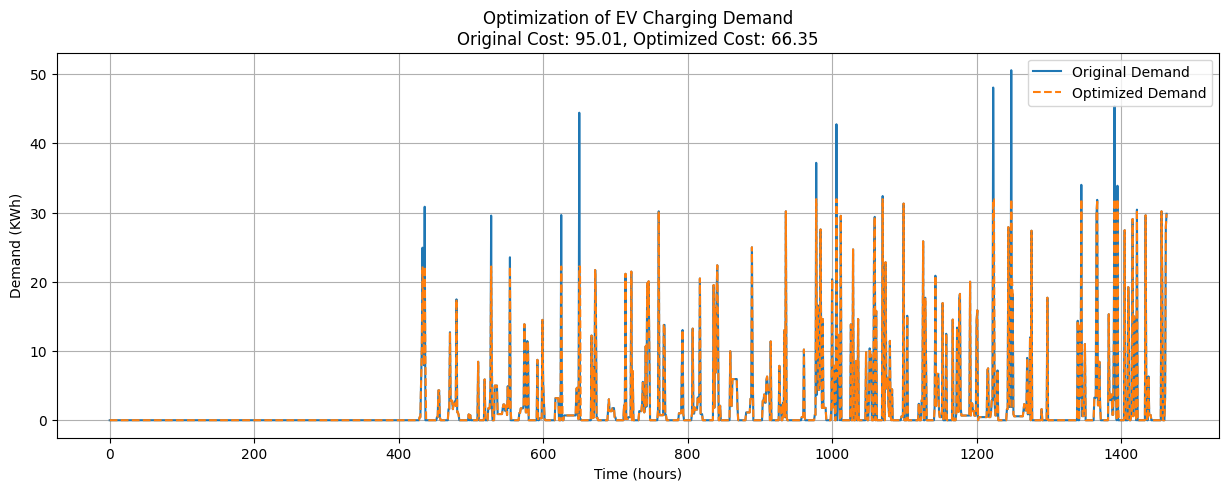

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Constants
alpha = 0.1

# Load data
P0 = merged_data['kWhDelivered'].values  # Assuming the column for energy is 'KWhDelivered'

# Variables
D = cp.Variable(len(P0))  # Deferred energy

# Constraints
constraints = [D >= 0, D <= P0]  # Cannot defer more than available, no negative deferral
P = P0 - D + cp.hstack([0, D[:-1]])  # Shift D(t-1) to P(t)

# Cost function
P1 = cp.max(P[:720])
P2 = cp.max(P[745:1464])
objective = cp.Minimize(P1 + P2 + alpha * cp.sum(D))

problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimized deferred values and new demand profile
D_optimized = D.value
P_optimized = P0 - D_optimized + np.hstack([0, D_optimized[:-1]])

# Calculate costs for visualization
cost_original = max(P0[:720]) + max(P0[745:1464])
cost_optimized = max(P_optimized[:720]) + max(P_optimized[745:1464])
total_cost_optimized = max(P_optimized[:720]) + max(P_optimized[745:1464]) + alpha * sum(D_optimized)
# print(total_cost_optimized)

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(P0, label='Original Demand')
plt.plot(P_optimized, label='Optimized Demand', linestyle='--')
plt.title(f'Optimization of EV Charging Demand\nOriginal Cost: {cost_original:.2f}, Optimized Cost: {total_cost_optimized:.2f}')
plt.xlabel('Time (hours)')
plt.ylabel('Demand (KWh)')
plt.legend()
plt.grid(True)
plt.show()


Alpha: 0.01, Optimized Cost: 50.19
Alpha: 0.05, Optimized Cost: 59.44
Alpha: 0.1, Optimized Cost: 66.35
Alpha: 0.2, Optimized Cost: 76.69
Alpha: 0.3, Optimized Cost: 81.92
Alpha: 0.5, Optimized Cost: 86.97
Alpha: 0.8, Optimized Cost: 91.80
Alpha: 1, Optimized Cost: 95.01
Alpha: 2, Optimized Cost: 95.01
Alpha: 3, Optimized Cost: 95.01
Alpha: 4, Optimized Cost: 95.01


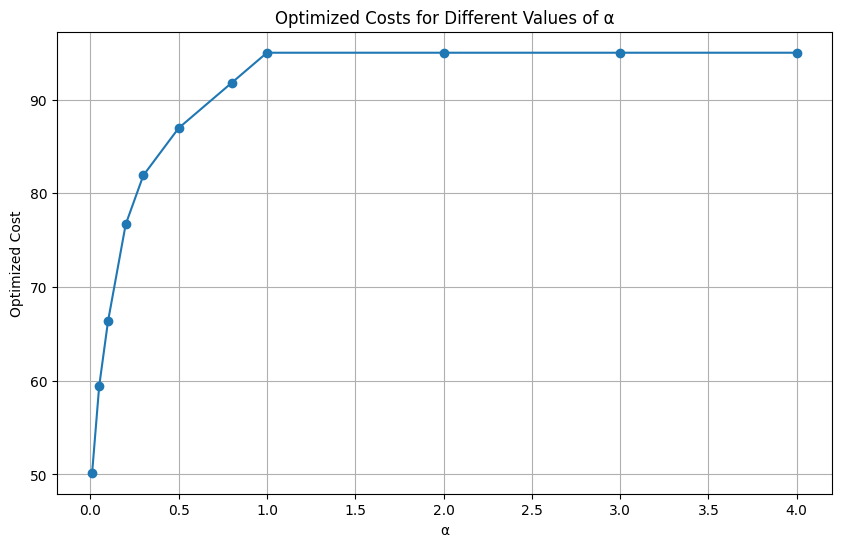

In [ ]:
# Function to run the optimization problem for different values of alpha
def run_optimization(alpha_values, P0):
    costs = []
    for alpha in alpha_values:
        # Define the optimization variables and parameters
        D = cp.Variable(len(P0))
        constraints = [D >= 0, D <= P0]
        P = P0 - D + cp.hstack([0, D[:-1]])

        # Define the cost function
        P1 = cp.max(P[:720])
        P2 = cp.max(P[745:1464])
        objective = cp.Minimize(P1 + P2 + alpha * cp.sum(D))

        # Define and solve the problem
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Store the results
        D_optimized = D.value
        P_optimized = P0 - D_optimized + np.hstack([0, D_optimized[:-1]])
        total_cost_optimized = max(P_optimized[:720]) + max(P_optimized[745:1464]) + alpha * sum(D_optimized)

        # Record the optimized cost for the current value of alpha
        costs.append((alpha, total_cost_optimized))

    return costs

# Sample P0 values, replace with actual data
P0 = merged_data['kWhDelivered'].values

# Define the alpha values to test
alpha_values = [0.01, 0.05,0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 3, 4]

# Run the optimization for the defined alpha values
costs_for_different_alpha = run_optimization(alpha_values, P0)

# Print the results
for alpha, cost in costs_for_different_alpha:
    print(f"Alpha: {alpha}, Optimized Cost: {cost:.2f}")

# Plotting the results for different alphas
plt.figure(figsize=(10, 6))
alphas = [cost[0] for cost in costs_for_different_alpha]
optimized_costs = [cost[1] for cost in costs_for_different_alpha]
plt.plot(alphas, optimized_costs, marker='o')
plt.title('Optimized Costs for Different Values of α')
plt.xlabel('α')
plt.ylabel('Optimized Cost')
plt.grid(True)
plt.show()
